In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from utils import apply_fill

## Loading dataset

In [5]:
df = pd.read_csv("../data/delays_train.csv")
df_oos = pd.read_csv("../data/delays_test.csv")

In [6]:
df.head()

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,6,6,25,1222,1444,B6,20409,520,10397,12478.0,...,False,1224.0,107.0,760.0,25.140220,19.357739,21.019808,15.452723,0.0,0.0
1,2,6,21,1216,1304,NaN,19805,6297,14107,15376.0,...,False,1216.0,23.0,110.0,13.279939,20.470690,18.045064,12.910265,0.0,0.0
2,3,1,5,1945,2055,DL,19790,4124,13487,13076.0,...,False,1945.0,36.0,119.0,17.816202,13.967273,21.606228,17.976362,0.0,0.1
3,2,3,22,700,924,AA,19805,1538,15624,11298.0,...,False,658.0,125.0,641.0,24.562566,14.509228,24.946489,22.630553,0.0,0.0
4,4,7,14,2130,2359,NaN,19930,1116,14747,12889.0,...,False,2133.0,130.0,867.0,8.817992,10.866812,17.426336,17.401007,0.0,0.0


## Description of variables

The dataset includes 1631327 observations in the training sample and 407832 in the test sample and the following columns:

### Independent variables

- `Weekday` – Day of the week when the flight occurred (1 for Sunday, 7 for Saturday).

- `Month_of_Year` – The numerical month (1-12) when the flight took place.

- `Day_of_Month` – The day of the month (1-31) when the flight occurred.

- `Scheduled_Departure_Time` – The scheduled local time of flight departure.

- `Scheduled_Arrival_Time` – The scheduled local time of flight arrival.

- `Marketing_Airline` – The airline code under which the flight was marketed.

- `Marketing_Airline_DOT_ID` – Department of Transportation identifier for the marketing airline.

- `Flight_Number` – The number assigned to the flight by the operating airline.

- `Origin_Airport_ID` – Unique identifier for the departure airport.

- `Destination_Airport_ID` – Unique identifier for the arrival airport.

- `Flight_Cancelled` – Indicator of whether the flight was cancelled (1 = Yes, 0 = No).

- `Departure_State` – The state code of the departure location.

- `Arrival_State` – The state code of the arrival location.

- `Departure_Delay` – Total delay in minutes at departure.

- `Diverted_Airport_Landings` – Count of unplanned landings at other airports.

- `Taxi_Out_Time` – Time in minutes from gate departure until takeoff.

- `Taxi_In_Time` – Time in minutes from landing to gate arrival.

- `Flight_Diverted` – Indicator of whether the flight was diverted (1 = Yes, 0 = No).

- `Actual_Departure_Time` – The actual local time the flight departed.

- `Flight_Duration` – The duration of the flight in minutes from takeoff to landing.

- `Flight_Distance` – The total distance covered by the flight in miles.

- `Origin_Temperature` – The temperature at the origin airport at the time of the flight’s departure.

- `Destination_Temperature` – The temperature at the destination airport at the time of the flight’s arrival.

- `Origin_Wind_Speed` – The wind speed at the origin airport during the departure of the flight.

- `Destination_Wind_Speed` – The wind speed at the destination airport during the departure of the flight.

- `Origin_Precipitation` – The amount of precipitation, such as rain or snow, at the origin airport around the flight’s departure time.

- `Destination_Precipitation` – The amount of precipitation, such as rain or snow, at the destination airport around the flight’s arrival time.

### Dependent variable

- `Arrival_Delay` – Total delay in minutes at arrival (only in the training sample)

## Inspecting data

In [7]:
df.sample(20)

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
1376681,5,5,6,740,1124,AS,19930,682,14747,11292.0,...,False,734.0,114.0,1024.0,19.805054,19.663356,24.348033,20.223617,0.0,0.5
780630,7,1,16,2000,2158,UA,19977,3860,13930,13029.0,...,False,1953.0,74.0,466.0,16.933161,18.128150,12.713126,16.199787,0.0,0.0
1256142,7,5,15,930,1122,UA,19977,5021,13930,NaN,...,False,921.0,90.0,583.0,12.523076,19.405107,18.591962,15.260011,0.0,0.1
1610501,6,1,22,1440,1615,DL,19790,1670,11066,10397.0,...,False,1434.0,67.0,447.0,24.150001,23.678679,16.273807,14.904600,0.0,0.0
977729,2,3,22,1656,1759,AA,19805,3771,11298,13851.0,...,False,1653.0,32.0,175.0,17.044285,10.011800,14.774904,13.943111,0.0,0.1
529482,6,4,23,710,757,AS,19930,3418,10713,NaN,...,False,706.0,87.0,523.0,15.064345,15.886383,15.814301,14.052846,1.0,0.1
568998,3,7,6,1302,1547,AA,19805,3625,10693,11278.0,...,False,1257.0,82.0,562.0,16.578977,20.499361,25.203320,18.988631,0.0,0.0
992006,1,3,21,1720,1852,DL,19790,5594,14492,12953.0,...,False,1718.0,69.0,431.0,19.852247,14.561624,17.796680,20.242511,0.0,0.0
719936,3,6,1,810,1420,WN,19393,517,14747,13232.0,...,False,807.0,208.0,1733.0,20.879006,25.750718,27.160918,27.892402,0.0,0.0
26922,7,6,12,803,958,NaN,19805,550,14027,11057.0,...,False,756.0,104.0,590.0,20.013432,13.573795,21.041595,21.045311,0.0,0.0


In [8]:
df.columns

Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline',
       'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID',
       'Destination_Airport_ID', 'Flight_Cancelled', 'Departure_State',
       'Arrival_State', 'Departure_Delay', 'Arrival_Delay',
       'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
       'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
       'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
       'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
       'Destination_Precipitation'],
      dtype='object')

In [9]:
df.shape

(1631327, 28)

# Data Cleaning

## Checking variable types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631327 entries, 0 to 1631326
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Weekday                    1631327 non-null  int64  
 1   Month_of_Year              1631327 non-null  int64  
 2   Day_of_Month               1631327 non-null  int64  
 3   Scheduled_Departure_Time   1631327 non-null  int64  
 4   Scheduled_Arrival_Time     1631327 non-null  int64  
 5   Marketing_Airline          1467776 non-null  object 
 6   Marketing_Airline_DOT_ID   1631327 non-null  int64  
 7   Flight_Number              1631327 non-null  int64  
 8   Origin_Airport_ID          1631327 non-null  int64  
 9   Destination_Airport_ID     1468233 non-null  float64
 10  Flight_Cancelled           1631327 non-null  bool   
 11  Departure_State            1631327 non-null  object 
 12  Arrival_State              1631327 non-null  object 
 13  Departure_De

In [11]:
obj_cols = ["Marketing_Airline", "Departure_State", "Arrival_State"]

In [12]:
df["Marketing_Airline"].value_counts()

Marketing_Airline
AA    375902
DL    305171
UA    266797
WN    263954
AS     80328
B6     56734
NK     46124
F9     31258
G4     26422
HA     15086
Name: count, dtype: int64

In [13]:
df["Departure_State"].nunique()

53

In [14]:
df["Arrival_State"].nunique()

53

## Checking for missing values

In [15]:
df.isna().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline            163551
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       163094
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              206461
Arrival_Delay                211306
Diverted_Airport_Landings         0
Taxi_Out_Time                 49225
Taxi_In_Time                  49867
Flight_Diverted                   0
Actual_Departure_Time         48326
Flight_Duration              211490
Flight_Distance              163190
Origin_Temperature           163190
Destination_Temperature      163190
Origin_Wind_Speed            211490
Destination_Wind_Speed       211490
Origin_Precipitation              0
Destination_Precipitation   

In [16]:
df_oos.isna().sum()

Weekday                          0
Month_of_Year                    0
Day_of_Month                     0
Scheduled_Departure_Time         0
Scheduled_Arrival_Time           0
Marketing_Airline            40364
Marketing_Airline_DOT_ID         0
Flight_Number                    0
Origin_Airport_ID                0
Destination_Airport_ID       40821
Flight_Cancelled                 0
Departure_State                  0
Arrival_State                    0
Departure_Delay              51789
Diverted_Airport_Landings        0
Taxi_Out_Time                12264
Taxi_In_Time                 12430
Flight_Diverted                  0
Actual_Departure_Time        12016
Flight_Duration              52666
Flight_Distance              40725
Origin_Temperature           40725
Destination_Temperature      40725
Origin_Wind_Speed            52666
Destination_Wind_Speed       52666
Origin_Precipitation             0
Destination_Precipitation        0
dtype: int64

### Columns with missing values 

In [17]:
na_cols = ["Marketing_Airline", "Destination_Airport_ID", "Departure_Delay", "Arrival_Delay", "Taxi_Out_Time", "Taxi_In_Time", "Actual_Departure_Time", "Flight_Duration", "Flight_Distance", "Origin_Temperature", "Destination_Temperature", "Origin_Wind_Speed", "Destination_Wind_Speed"]

### Analysis of Flight_Cancelled column

In [18]:
df[df["Flight_Cancelled"] == True][na_cols].isna().sum()

Marketing_Airline           4941
Destination_Airport_ID      4978
Departure_Delay            48467
Arrival_Delay              49450
Taxi_Out_Time              49225
Taxi_In_Time               49450
Actual_Departure_Time      48326
Flight_Duration            49450
Flight_Distance             4845
Origin_Temperature          4845
Destination_Temperature     4845
Origin_Wind_Speed          49450
Destination_Wind_Speed     49450
dtype: int64

In [19]:
df[df["Flight_Cancelled"] == True].shape

(49450, 28)

As we can see all cancelled flights have missing values for Arrival_Delay variable. Those values should be filled as we should consider cancelled flights in the model

In [20]:
df[df["Flight_Cancelled"] == False][na_cols].isna().sum()

Marketing_Airline          158610
Destination_Airport_ID     158116
Departure_Delay            157994
Arrival_Delay              161856
Taxi_Out_Time                   0
Taxi_In_Time                  417
Actual_Departure_Time           0
Flight_Duration            162040
Flight_Distance            158345
Origin_Temperature         158345
Destination_Temperature    158345
Origin_Wind_Speed          162040
Destination_Wind_Speed     162040
dtype: int64

### Missing values in target column

In [21]:
len(df[df["Arrival_Delay"].isna()]) / len(df) * 100

12.953013099151795

All observations missing Arrival_Delay value should be discarded

In [22]:
df = df.dropna(subset=["Arrival_Delay"])

In [23]:
df["Flight_Cancelled"].value_counts()

Flight_Cancelled
False    1420021
Name: count, dtype: int64

In [24]:
df_oos = df_oos[df_oos["Flight_Cancelled"] == False]

In [25]:
df[df["Flight_Cancelled"] == False]["Arrival_Delay"].isna().sum()

np.int64(0)

### Missing values matrix

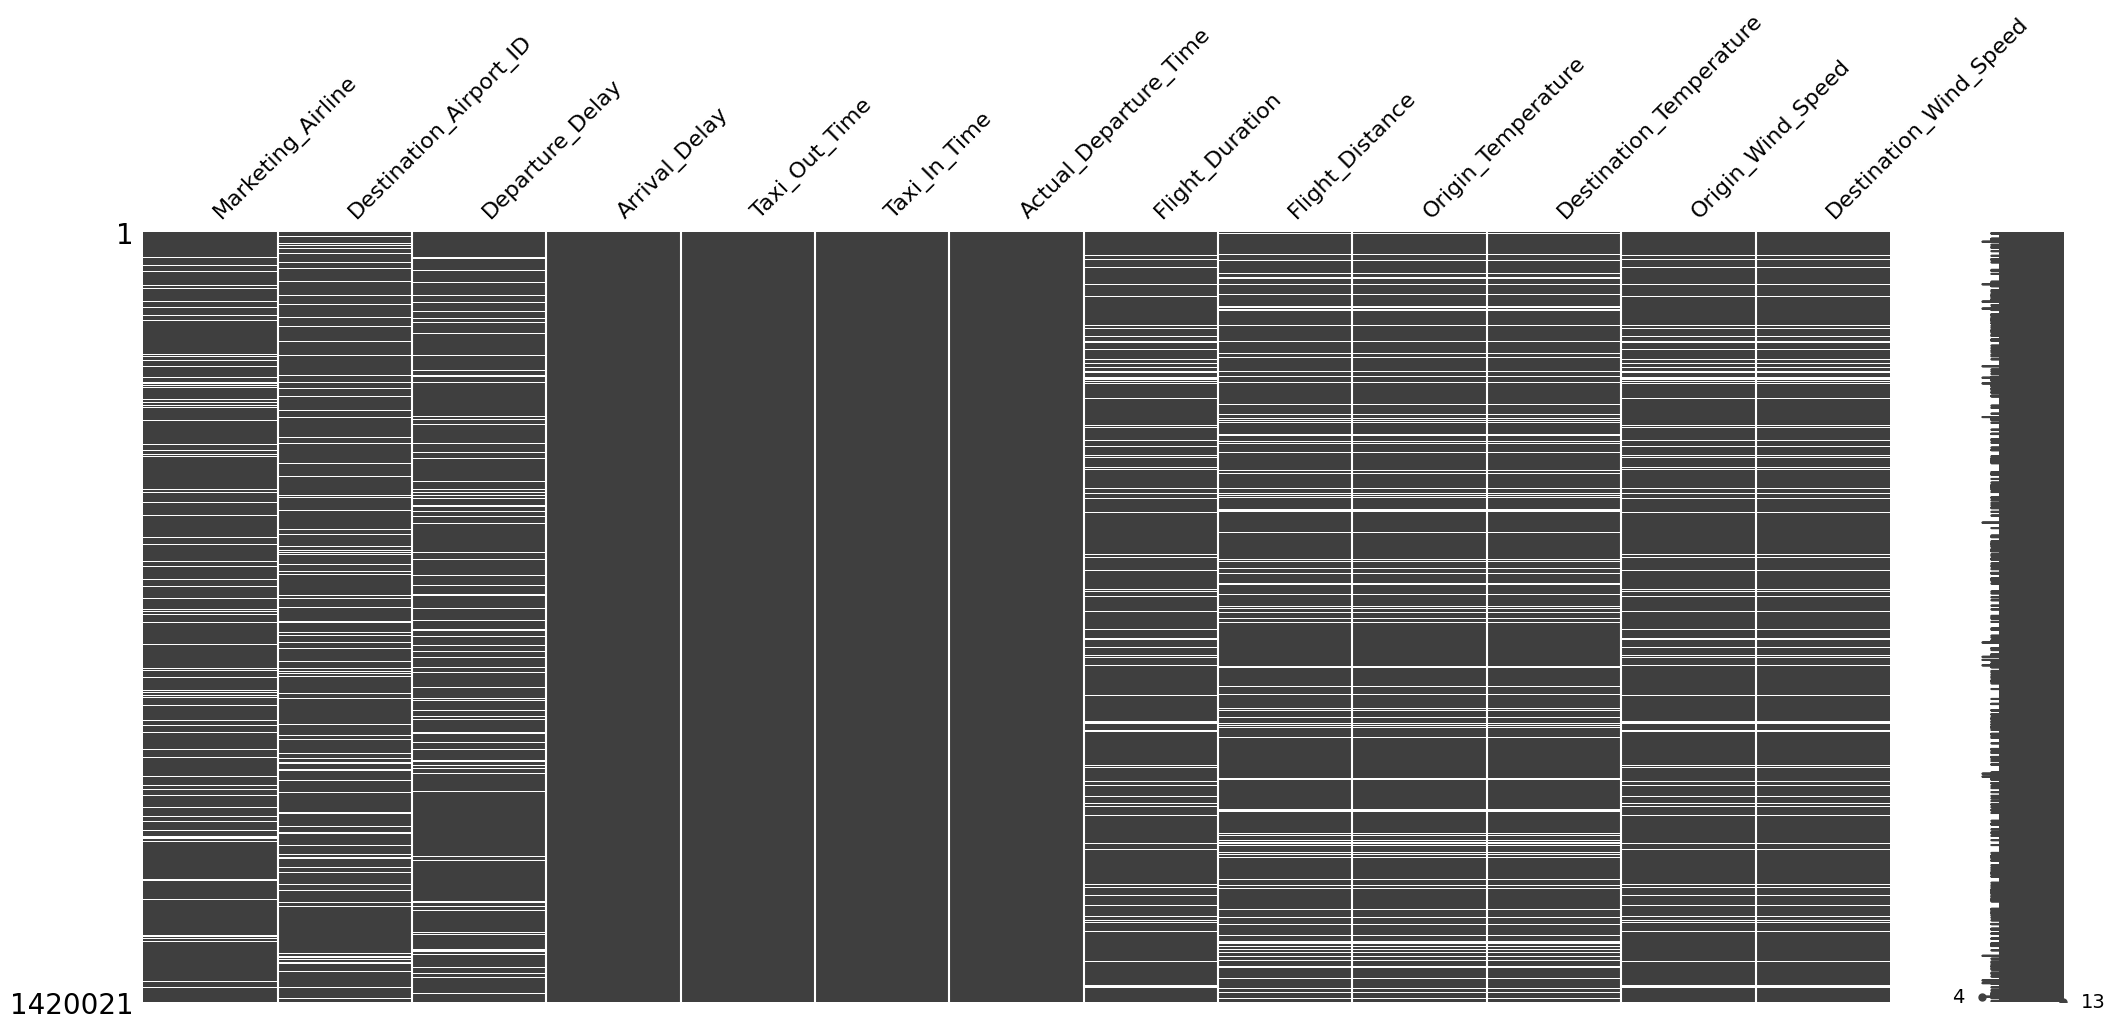

In [26]:
msno.matrix(df[na_cols]);

In [27]:
df.isna().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline            142322
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       142006
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              141709
Arrival_Delay                     0
Diverted_Airport_Landings         0
Taxi_Out_Time                     0
Taxi_In_Time                      0
Flight_Diverted                   0
Actual_Departure_Time             0
Flight_Duration              142276
Flight_Distance              142235
Origin_Temperature           142235
Destination_Temperature      142235
Origin_Wind_Speed            142276
Destination_Wind_Speed       142276
Origin_Precipitation              0
Destination_Precipitation   

## Imputation of missing values

### Flight_Distance column

<Axes: >

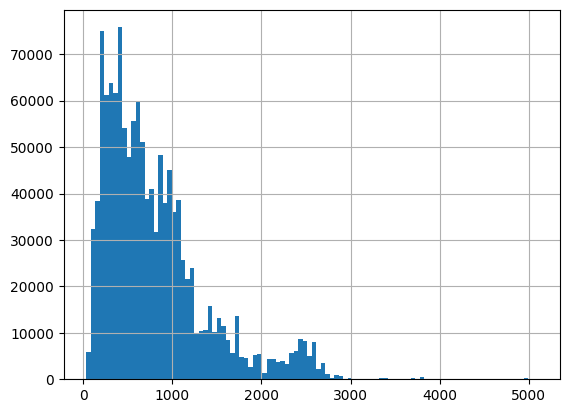

In [28]:
df["Flight_Distance"].hist(bins=100)

In [29]:
df["Flight_Distance"].describe()

count    1.277786e+06
mean     7.992327e+02
std      5.930995e+02
min      3.100000e+01
25%      3.680000e+02
50%      6.430000e+02
75%      1.036000e+03
max      5.095000e+03
Name: Flight_Distance, dtype: float64

As distance is dependent mainly on the origin and destination airports, we should inpute missing values based on the median for Flight_Distances for flights between given Origin_Airport_ID and Destination_Airport_ID

In [30]:
distances = df.groupby(["Origin_Airport_ID", "Destination_Airport_ID"])["Flight_Distance"].median()
distances = {index: value for (index, value) in zip(distances.index.values.tolist(), distances.values.tolist())}

In [31]:
df["Flight_Distance"] = apply_fill(df, "Origin_Airport_ID", "Destination_Airport_ID", "Flight_Distance", distances)
df["Flight_Distance"] = apply_fill(df, "Destination_Airport_ID", "Origin_Airport_ID", "Flight_Distance", distances)

In [32]:
df_oos["Flight_Distance"] = apply_fill(df_oos, "Origin_Airport_ID", "Destination_Airport_ID", "Flight_Distance", distances)
df_oos["Flight_Distance"] = apply_fill(df_oos, "Destination_Airport_ID", "Origin_Airport_ID", "Flight_Distance", distances)

In [33]:
df["Flight_Distance"].isna().sum()

np.int64(14101)

In [34]:
df_oos["Flight_Distance"].isna().sum()

np.int64(4024)

Because we could not fill all missing values due to the missing data in Destination_Airport_ID column, we can use median for Flight_Distance between given Departure_State and Arrival_State

In [35]:
distances_states = df.groupby(["Departure_State", "Arrival_State"])["Flight_Distance"].mean()
distances_states = {index: value for (index, value) in zip(distances_states.index.values.tolist(), distances_states.values.tolist())}

In [36]:
df["Flight_Distance"] = apply_fill(df, "Departure_State", "Arrival_State", "Flight_Distance", distances_states)
df["Flight_Distance"] = apply_fill(df, "Arrival_State", "Departure_State", "Flight_Distance", distances_states)

In [37]:
df_oos["Flight_Distance"] = apply_fill(df_oos, "Departure_State", "Arrival_State", "Flight_Distance", distances_states)
df_oos["Flight_Distance"] = apply_fill(df_oos, "Arrival_State", "Departure_State", "Flight_Distance", distances_states)

In [38]:
df["Flight_Distance"].isna().sum()

np.int64(0)

In [39]:
df_oos["Flight_Distance"].isna().sum()

np.int64(0)

<Axes: >

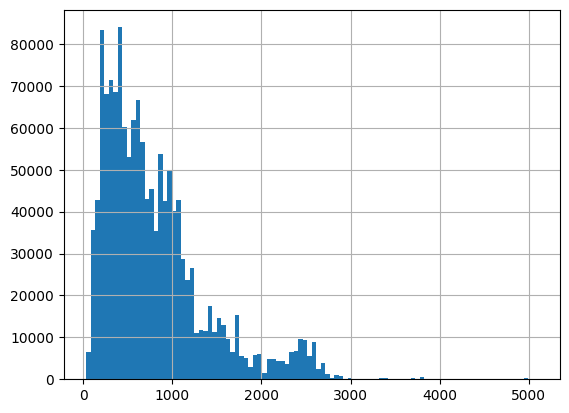

In [40]:
df["Flight_Distance"].hist(bins=100)

### Flight_Duration column

Here we can follow the same approach as with Flight_Distance column

<Axes: >

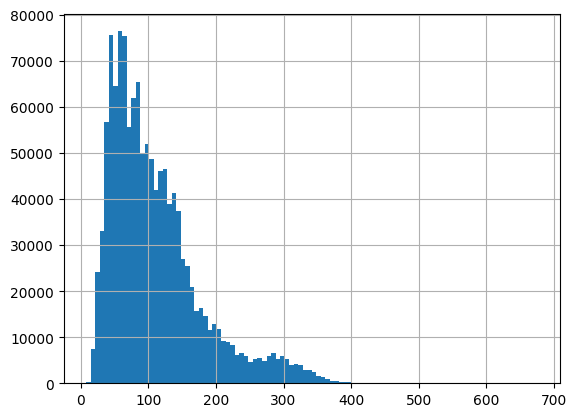

In [41]:
df["Flight_Duration"].hist(bins=100)

In [42]:
df["Flight_Duration"].describe()

count    1.277745e+06
mean     1.111059e+02
std      7.003402e+01
min      8.000000e+00
25%      6.000000e+01
50%      9.400000e+01
75%      1.410000e+02
max      6.750000e+02
Name: Flight_Duration, dtype: float64

In [43]:
durations = df.groupby(["Origin_Airport_ID", "Destination_Airport_ID"])["Flight_Duration"].median()
durations = {index: value for (index, value) in zip(durations.index.values.tolist(), durations.values.tolist())}

In [44]:
df["Flight_Duration"] = apply_fill(df, "Origin_Airport_ID", "Destination_Airport_ID", "Flight_Duration", durations)
df["Flight_Duration"] = apply_fill(df, "Destination_Airport_ID", "Origin_Airport_ID", "Flight_Duration", durations)

In [45]:
df_oos["Flight_Duration"] = apply_fill(df_oos, "Origin_Airport_ID", "Destination_Airport_ID", "Flight_Duration", durations)
df_oos["Flight_Duration"] = apply_fill(df_oos, "Destination_Airport_ID", "Origin_Airport_ID", "Flight_Duration", durations)

In [46]:
df["Flight_Duration"].isna().sum()

np.int64(14135)

In [47]:
df_oos["Flight_Duration"].isna().sum()

np.int64(3938)

In [48]:
durations_states = df.groupby(["Departure_State", "Arrival_State"])["Flight_Duration"].median()
durations_states = {index: value for (index, value) in zip(durations_states.index.values.tolist(), durations_states.values.tolist())}

In [49]:
df["Flight_Duration"] = apply_fill(df, "Departure_State", "Arrival_State", "Flight_Duration", durations_states)
df["Flight_Duration"] = apply_fill(df, "Arrival_State", "Departure_State", "Flight_Duration", durations_states)

In [50]:
df_oos["Flight_Duration"] = apply_fill(df_oos, "Departure_State", "Arrival_State", "Flight_Duration", durations_states)
df_oos["Flight_Duration"] = apply_fill(df_oos, "Arrival_State", "Departure_State", "Flight_Duration", durations_states)

In [51]:
df["Flight_Duration"].isna().sum()

np.int64(0)

In [52]:
df_oos["Flight_Duration"].isna().sum()

np.int64(0)

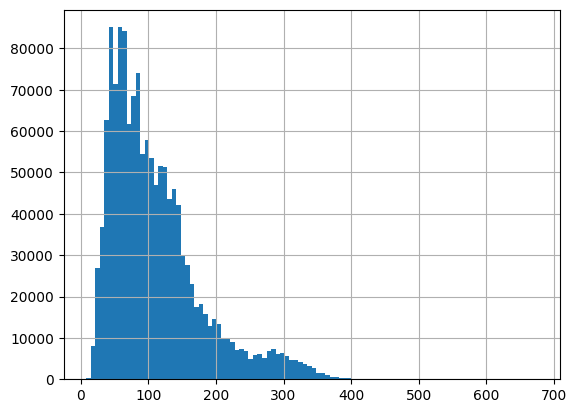

In [53]:
df["Flight_Duration"].hist(bins=100);

### Departure_Delay column

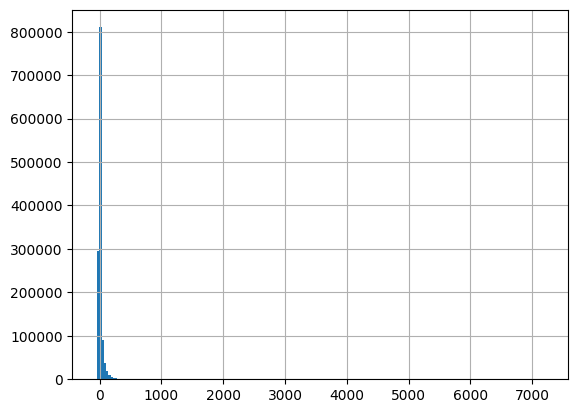

In [54]:
df["Departure_Delay"].hist(bins=200);

In [55]:
df["Departure_Delay"].describe()

count    1.278312e+06
mean     1.302785e+01
std      5.366118e+01
min     -7.832814e+01
25%     -5.078712e+00
50%     -1.605447e+00
75%      1.053867e+01
max      7.223210e+03
Name: Departure_Delay, dtype: float64

We can use median of Depatrue_Delay depending on airport to get more accurate data

In [56]:
departure_delays = df.groupby("Origin_Airport_ID")["Departure_Delay"].median()
departure_delays = {index: value for (index, value) in zip(departure_delays.index.values.tolist(), departure_delays.values.tolist())}

In [57]:
df["Departure_Delay"] = df.apply(
    lambda row: departure_delays[row["Origin_Airport_ID"]] if np.isnan(row["Departure_Delay"]) 
    and row["Origin_Airport_ID"] in departure_delays.keys()
    else row["Departure_Delay"],
    axis=1
)

In [58]:
df_oos["Departure_Delay"] = df_oos.apply(
    lambda row: departure_delays[row["Origin_Airport_ID"]] if np.isnan(row["Departure_Delay"]) 
    and row["Origin_Airport_ID"] in departure_delays.keys()
    else row["Departure_Delay"],
    axis=1
)

In [59]:
df["Departure_Delay"].isna().sum()

np.int64(0)

In [60]:
df_oos["Departure_Delay"].isna().sum()

np.int64(0)

### Origin_Wind_Speed column

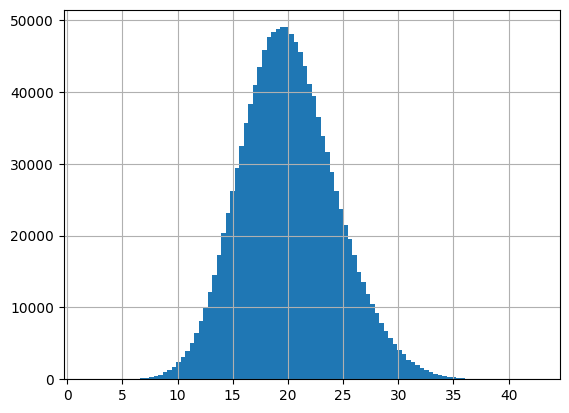

In [61]:
df["Origin_Wind_Speed"].hist(bins=100);

As we can see, this column values follow a distribution

In [62]:
sms.jarque_bera(df["Origin_Wind_Speed"].dropna())

(np.float64(14548.543224193201),
 np.float64(0.0),
 np.float64(0.2592322238495145),
 np.float64(3.066792371019474))

Jarque-Bera test rejects the null hypothesis that the distribution is normal.

However, we can use numpy to impute the values at random with this distribution

In [63]:
missing = df["Origin_Wind_Speed"].isnull()
dist = df["Origin_Wind_Speed"].value_counts(normalize=True)
df.loc[missing,"Origin_Wind_Speed"] = np.random.choice(dist.index, size=len(df[missing]),p=dist.values)

In [64]:
missing_oos = df_oos["Origin_Wind_Speed"].isnull()
df_oos.loc[missing_oos,"Origin_Wind_Speed"] = np.random.choice(dist.index, size=len(df_oos[missing_oos]),p=dist.values)

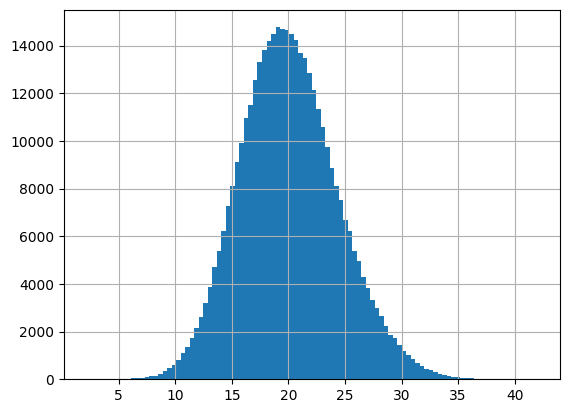

In [65]:
df_oos["Origin_Wind_Speed"].hist(bins=100);

### Destination_Wind_Speed column

We can use the same approach as above with Destination_Wind_Speed column

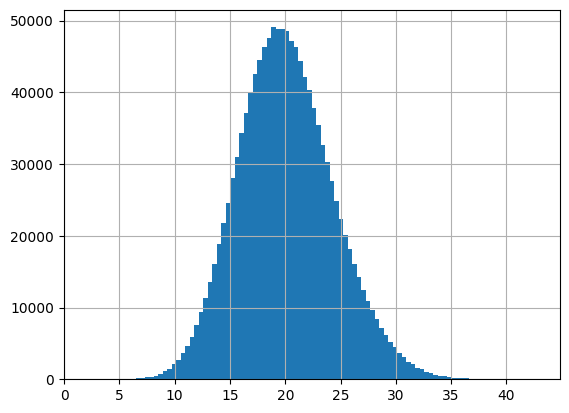

In [66]:
df["Destination_Wind_Speed"].hist(bins=100);

In [67]:
sms.jarque_bera(df["Destination_Wind_Speed"].dropna())

(np.float64(14706.241679443654),
 np.float64(0.0),
 np.float64(0.26008829724875043),
 np.float64(3.0751330769469276))

In [68]:
missing = df["Destination_Wind_Speed"].isnull()
dist = df["Destination_Wind_Speed"].value_counts(normalize=True)
df.loc[missing,"Destination_Wind_Speed"] = np.random.choice(dist.index, size=len(df[missing]),p=dist.values)

In [69]:
missing_oos = df_oos["Destination_Wind_Speed"].isnull()
df_oos.loc[missing_oos,"Destination_Wind_Speed"] = np.random.choice(dist.index, size=len(df_oos[missing_oos]),p=dist.values)

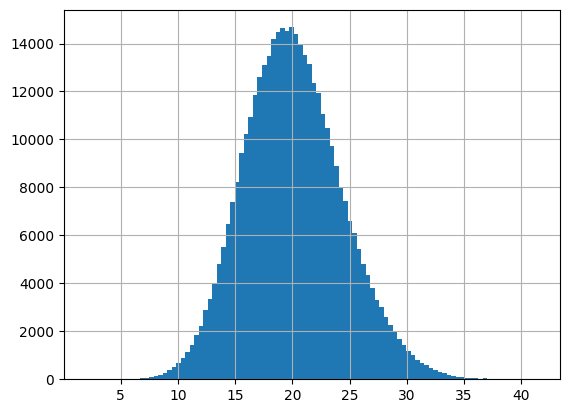

In [70]:
df_oos["Destination_Wind_Speed"].hist(bins=100);

### Origin_Temperature column

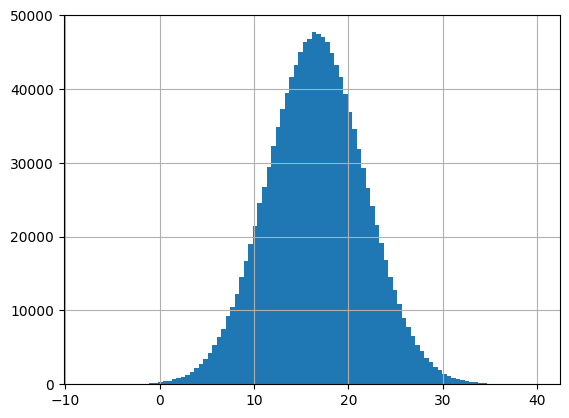

In [71]:
df["Origin_Temperature"].hist(bins=100);

Again we can see that this column values also follow some distribution

In [72]:
sms.jarque_bera(df["Origin_Temperature"].dropna())

(np.float64(85.29880499507567),
 np.float64(3.0033077642541968e-19),
 np.float64(0.01913611564261452),
 np.float64(3.0117200716534085))

Jarque-Bera rejects a hypothesis that this distribution is normal.

We will again use numpy to impute random values from this distribution

In [73]:
missing = df["Origin_Temperature"].isnull()
dist = df["Origin_Temperature"].value_counts(normalize=True)
df.loc[missing,"Origin_Temperature"] = np.random.choice(dist.index, size=len(df[missing]),p=dist.values)

In [74]:
missing_oos = df_oos["Origin_Temperature"].isnull()
df_oos.loc[missing_oos,"Origin_Temperature"] = np.random.choice(dist.index, size=len(df_oos[missing_oos]),p=dist.values)

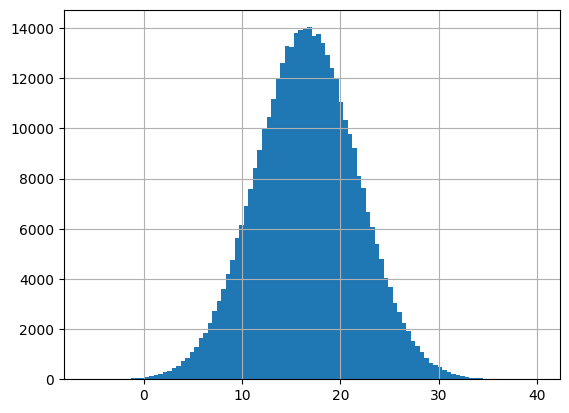

In [75]:
df_oos["Origin_Temperature"].hist(bins=100);

### Destination_Temperature column

We can use the same approach as with Origin_Temperature column

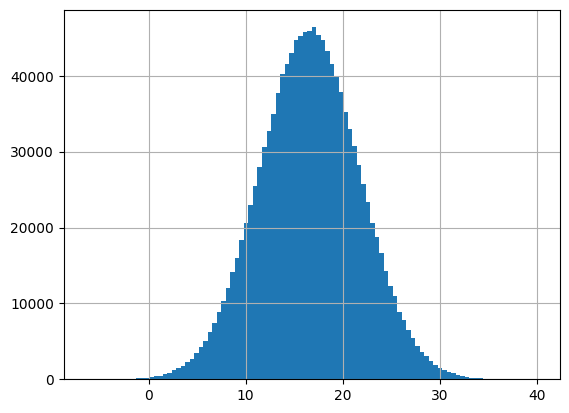

In [76]:
df["Destination_Temperature"].hist(bins=100);

In [77]:
sms.jarque_bera(df["Destination_Temperature"].dropna())

(np.float64(47.89829836350788),
 np.float64(3.972067901911013e-11),
 np.float64(0.014690256098174351),
 np.float64(3.0060361170782635))

In [78]:
missing = df["Destination_Temperature"].isnull()
dist = df["Destination_Temperature"].value_counts(normalize=True)
df.loc[missing,"Destination_Temperature"] = np.random.choice(dist.index, size=len(df[missing]),p=dist.values)

In [79]:
missing_oos = df_oos["Destination_Temperature"].isnull()
df_oos.loc[missing_oos,"Destination_Temperature"] = np.random.choice(dist.index, size=len(df_oos[missing_oos]),p=dist.values)

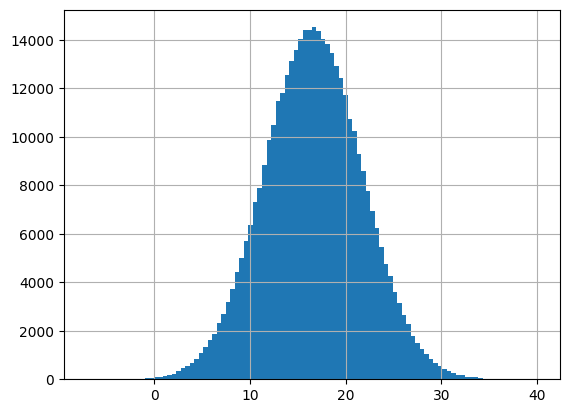

In [80]:
df_oos["Destination_Temperature"].hist(bins=100);

### Marketing_Ariline column

We can use column Marketing_Airline_DOT_ID to map IDs to airline names and impute missing values in Marketin_Airline columns. This imputation is purely for readibility reasons after one-hot encoding will be applied. We can also discard Marketin_Airline column in favour of Marketing_Airline_DOT_ID which do not have missing values.

In [81]:
coding = df[["Marketing_Airline", "Marketing_Airline_DOT_ID"]].value_counts().index.values.tolist()

In [82]:
coding = {v:k for (k,v) in coding}
coding

{19805: 'AA',
 19790: 'DL',
 19977: 'UA',
 19393: 'WN',
 19930: 'AS',
 20409: 'B6',
 20416: 'NK',
 20436: 'F9',
 20368: 'G4',
 19690: 'HA'}

In [83]:
df["Marketing_Airline"] = df["Marketing_Airline_DOT_ID"].replace(coding)

In [84]:
df_oos["Marketing_Airline"] = df_oos["Marketing_Airline_DOT_ID"].replace(coding)

## Data after imputation

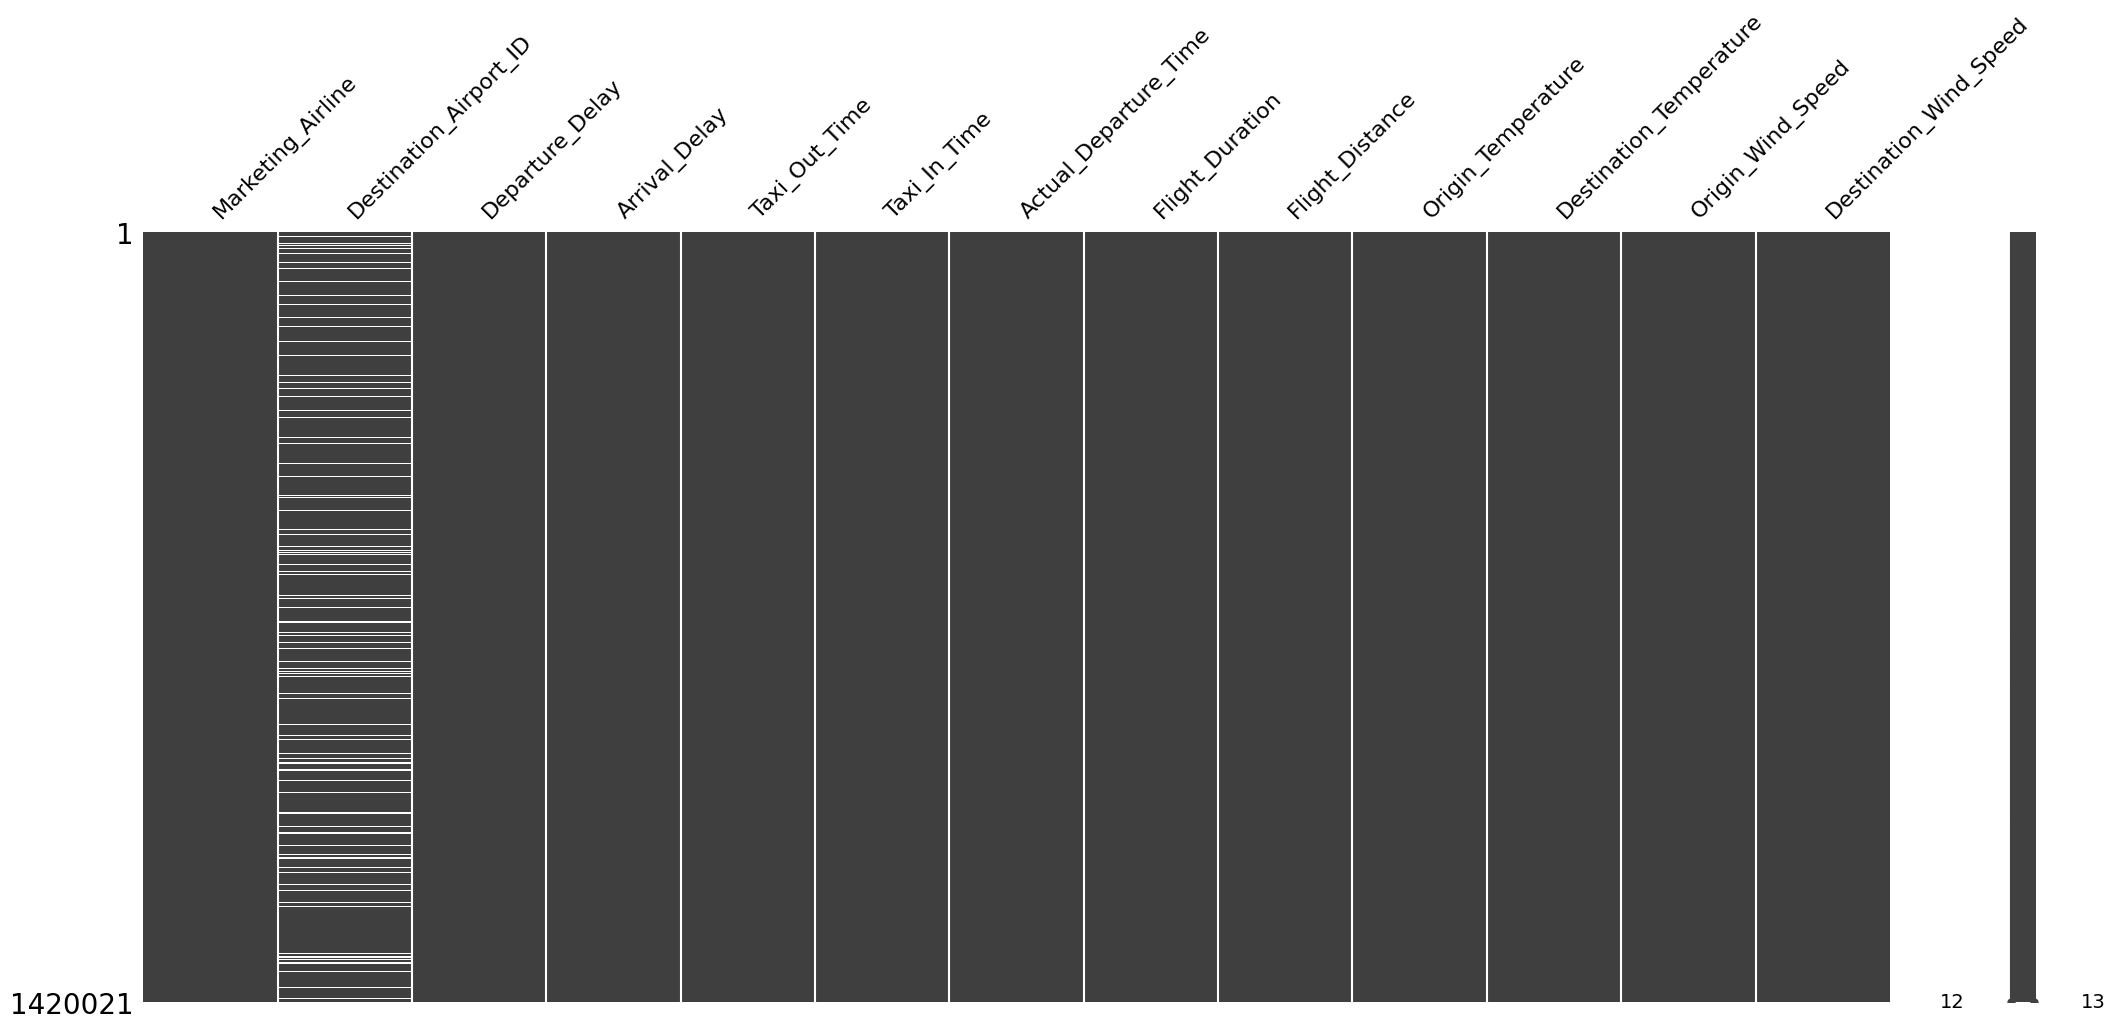

In [85]:
msno.matrix(df[na_cols]);

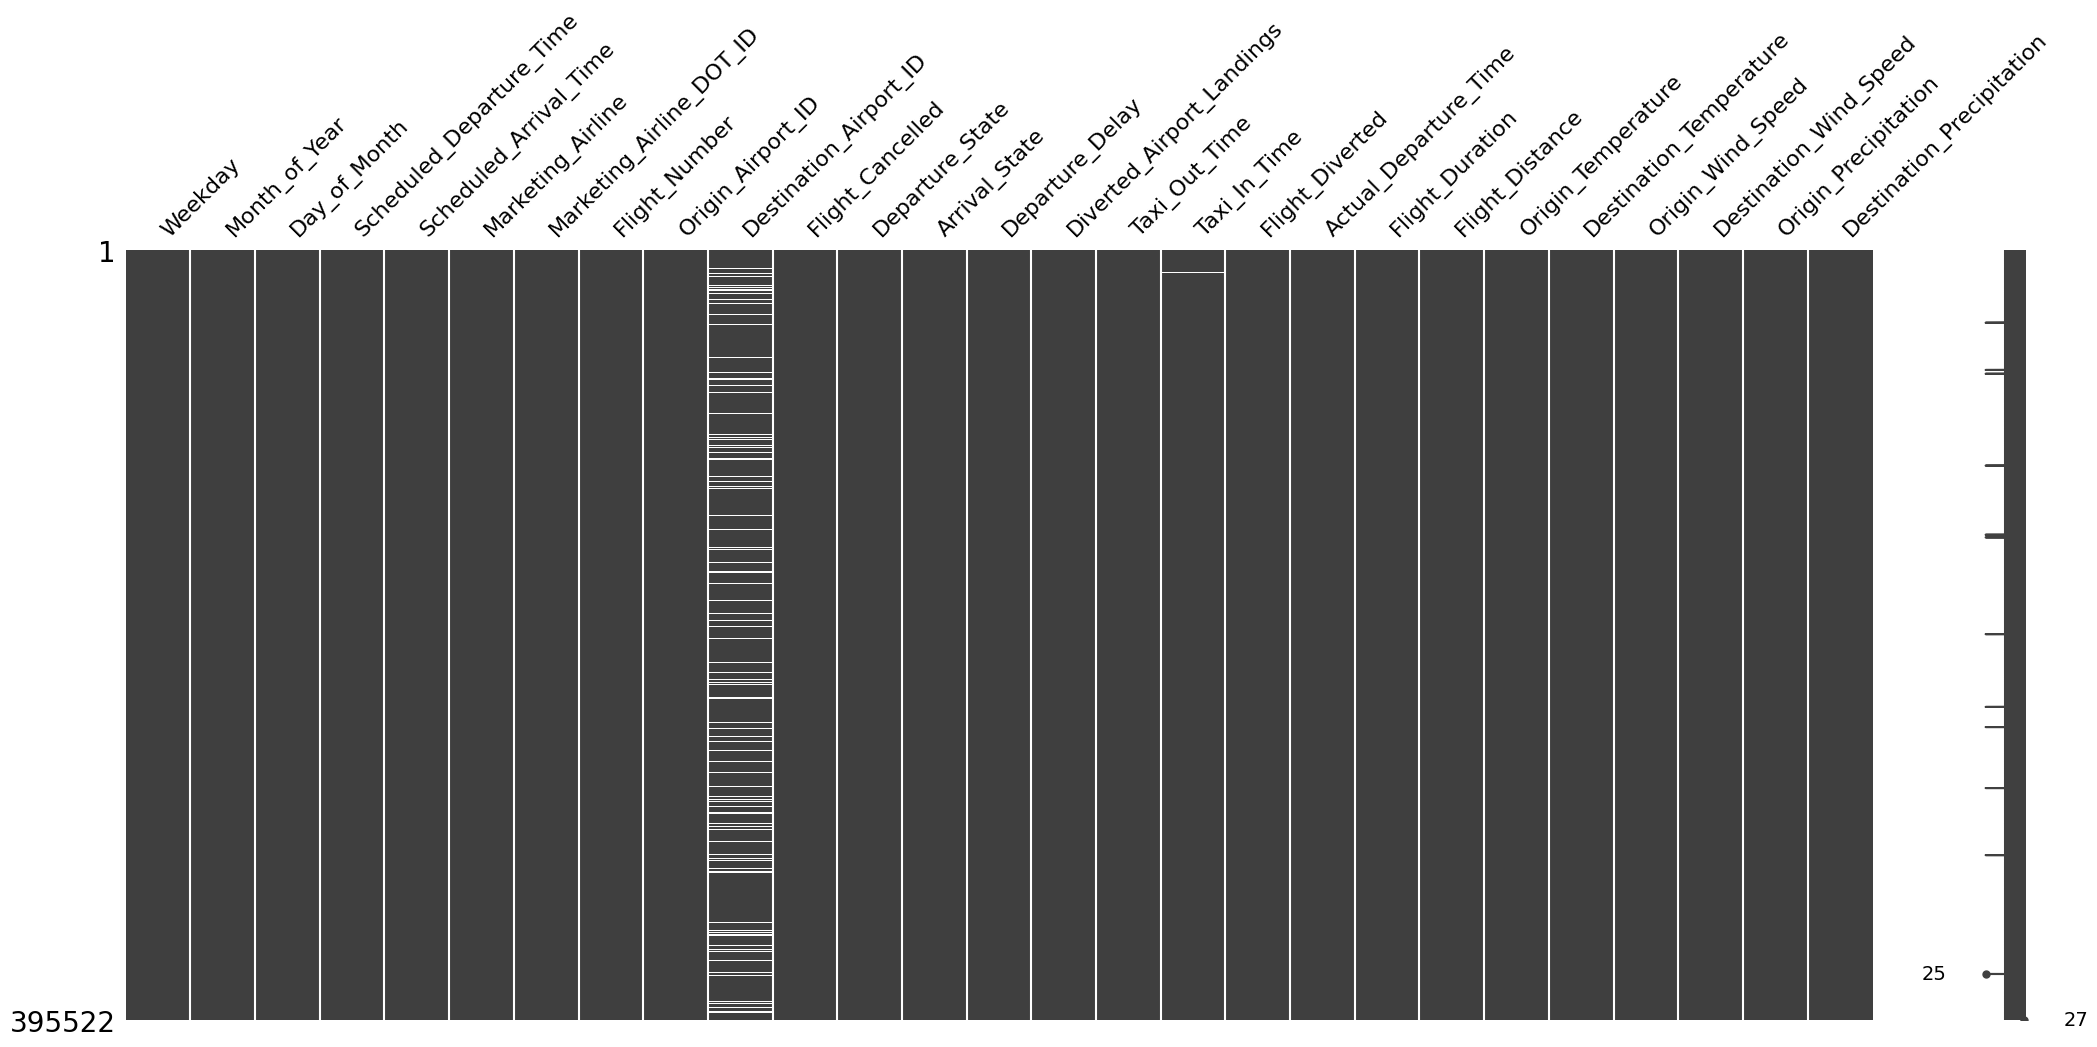

In [86]:
msno.matrix(df_oos);

As we can see, out-of-sample dataset has some missing values in Taxi_In_Time column

In [87]:
df_oos["Taxi_In_Time"].isna().sum()

np.int64(120)

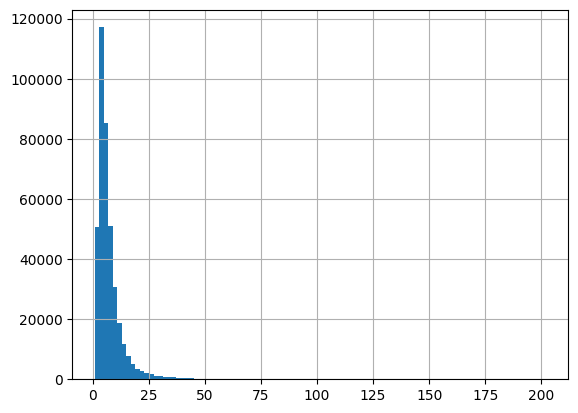

In [88]:
df_oos["Taxi_In_Time"].hist(bins=100);

We will impute this data based on median Taxi_In_Time for given Destination_Airport_ID

In [89]:
taxi_in = df.groupby("Destination_Airport_ID")["Taxi_In_Time"].median()
taxi_in = {index: value for (index, value) in zip(taxi_in.index.values.tolist(), taxi_in.values.tolist())}

In [90]:
df_oos["Taxi_In_Time"] = df_oos.apply(
    lambda row: taxi_in[row["Destination_Airport_ID"]] if np.isnan(row["Taxi_In_Time"]) 
    and not np.isnan(row["Destination_Airport_ID"]) 
    else row["Taxi_In_Time"],
    axis=1
)

In [91]:
df_oos["Taxi_In_Time"].isna().sum()

np.int64(12)

In [92]:
df_oos["Taxi_In_Time"] = df_oos["Taxi_In_Time"].fillna(df_oos["Taxi_In_Time"].median())

## Dropping redundant columns

In [93]:
df.drop(columns=["Destination_Airport_ID", "Flight_Cancelled", "Marketing_Airline_DOT_ID", "Flight_Number", "Origin_Airport_ID"], inplace=True)
df_oos.drop(columns=["Destination_Airport_ID", "Flight_Cancelled", "Marketing_Airline_DOT_ID", "Flight_Number", "Origin_Airport_ID"], inplace=True)

In [94]:
df.columns

Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline', 'Departure_State',
       'Arrival_State', 'Departure_Delay', 'Arrival_Delay',
       'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
       'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
       'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
       'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
       'Destination_Precipitation'],
      dtype='object')

In [95]:
df_oos.columns

Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline', 'Departure_State',
       'Arrival_State', 'Departure_Delay', 'Diverted_Airport_Landings',
       'Taxi_Out_Time', 'Taxi_In_Time', 'Flight_Diverted',
       'Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance',
       'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed',
       'Destination_Wind_Speed', 'Origin_Precipitation',
       'Destination_Precipitation'],
      dtype='object')

## Saving the data to the csv file

In [96]:
df.to_csv("../data/delays_imputed_train.csv", index=False)
df_oos.to_csv("../data/delays_imputed_test.csv")